In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
df_train = pd.read_csv('./train.csv')
df_test = pd.read_csv('./test.csv')

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df_train['Cabin']

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [6]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# 데이터 전처리

# cabin drop 및 Age의 Nan값을 전부 평균값으로 교체

# EDA 진행


In [9]:
df_train = df_train.drop('Cabin',axis=1)

In [10]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [11]:
import seaborn as sns

In [12]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

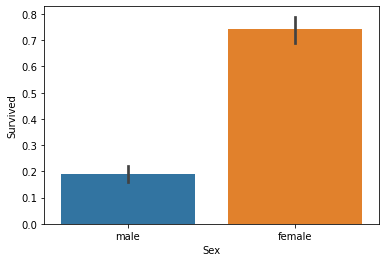

In [13]:
sns.barplot(x='Sex',y='Survived',data=df_train)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

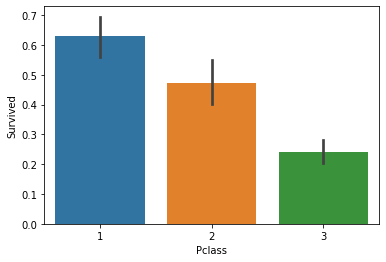

In [14]:
sns.barplot(x='Pclass',y='Survived',data=df_train)

In [15]:
df_train['Age'].fillna(df_train['Age'].mean(),inplace=True)

In [16]:
df_train['Embarked'].fillna('S',inplace=True)

In [17]:
df_train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [18]:
df_train.drop('PassengerId',axis=1,inplace=True)

In [19]:
df_train.dtypes.index

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked'],
      dtype='object')

In [20]:
df_train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked'],
      dtype='object')

In [21]:
df_train.drop('Name',axis=1,inplace=True)

In [22]:
df_train.drop('Ticket',axis=1,inplace=True)

In [23]:
df_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

# train, test split

In [24]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [25]:
word = [c for i,c in zip(df_train.dtypes,df_train.dtypes.index) if i =='O']
numeric = [c for c in df_train.columns if c not in word]

In [26]:
word

['Sex', 'Embarked']

In [27]:
numeric

['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [28]:
encoder = LabelEncoder()
for i in word:
    le = encoder.fit(df_train[i])
    df_train[i] = le.transform(df_train[i])

In [29]:
label = df_train['Survived']
features = df_train.drop('Survived',axis=1)

In [30]:
X_train, X_valid, y_train, y_valid = train_test_split(features,label,test_size = 0.2, stratify=label, shuffle=True, random_state=200)

In [31]:
X_test = df_test
for i in word:
    le = encoder.fit(X_test[i])
    X_test[i] = le.transform(X_test[i])
X_test = X_test.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)

In [32]:
# standardsaler 진행

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

# DecisionClassifier 수행

In [33]:
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score

In [35]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train,y_train)
pred = dt_clf.predict(X_valid)
score1 = accuracy_score(y_valid,pred)
print(score1)

0.7932960893854749


In [36]:
lgbm = LGBMClassifier()
lgbm.fit(X_train,y_train)
pred = lgbm.predict(X_valid)
score2 = accuracy_score(y_valid, pred)
print(score2)

0.8156424581005587


# K-Fold 및 GriedSearch 실행

In [43]:
from sklearn.model_selection import GridSearchCV

dt_clf=DecisionTreeClassifier()

X_train, y_train = features, label

params = {'max_depth' : [6,8,10,12,14,16,18,20], 'min_samples_split' : [2,4,6,8,10,12,14,16,18,20]}

grid_cv = GridSearchCV(dt_clf,param_grid=params, scoring='accuracy',cv=5, verbose=1)
grid_cv.fit(X_train,y_train)
print(grid_cv.best_score_)
print(grid_cv.best_params_)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8182160567447117
{'max_depth': 10, 'min_samples_split': 20}


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    2.6s finished


In [49]:
import warnings
warnings.filterwarnings('ignore')

lgbm = LGBMClassifier(n_jobs=-1)

X_train, y_train = features, label

params = {'learning_rate':[0.01,0.05,0.1,0.5,1,10,50,100],'n_estimators':[50,100,200,300,500]}

grid_cv = GridSearchCV(lgbm,param_grid = params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train,y_train)
print(grid_cv.best_score_)
print(grid_cv.best_params_)
grid_cv = GridSearchCV(lgbm,param_grid = params, scoring='accuracy', cv=3, verbose=1)
grid_cv.fit(X_train,y_train)
print('##########################')
print(grid_cv.best_score_)
print(grid_cv.best_params_)
grid_cv = GridSearchCV(lgbm,param_grid = params, scoring='accuracy', cv=7, verbose=1)
grid_cv.fit(X_train,y_train)
print('##########################')
print(grid_cv.best_score_)
print(grid_cv.best_params_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   47.0s finished


0.8417801770133702
{'learning_rate': 0.01, 'n_estimators': 500}
Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:   20.8s finished


##########################
0.8305274971941637
{'learning_rate': 0.01, 'n_estimators': 500}
Fitting 7 folds for each of 40 candidates, totalling 280 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


##########################
0.8351114313835772
{'learning_rate': 0.05, 'n_estimators': 100}


[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:  1.3min finished


In [52]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()

X_train, y_train = features, label

params = {'n_estimators':[5,10,20,30,50],'max_depth':[6,8,10,12]}

grid_cv = GridSearchCV(rf_clf,param_grid = params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train,y_train)
print(grid_cv.best_score_)
print(grid_cv.best_params_)
grid_cv = GridSearchCV(rf_clf,param_grid = params, scoring='accuracy', cv=3, verbose=1)
grid_cv.fit(X_train,y_train)
print('##########################')
print(grid_cv.best_score_)
print(grid_cv.best_params_)
grid_cv = GridSearchCV(rf_clf,param_grid = params, scoring='accuracy', cv=7, verbose=1)
grid_cv.fit(X_train,y_train)
print('##########################')
print(grid_cv.best_score_)
print(grid_cv.best_params_)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    5.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8350260498399347
{'max_depth': 8, 'n_estimators': 50}
Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    2.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


##########################
0.8237934904601572
{'max_depth': 8, 'n_estimators': 20}
Fitting 7 folds for each of 20 candidates, totalling 140 fits
##########################
0.8406742125984253
{'max_depth': 8, 'n_estimators': 20}


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    7.0s finished


In [54]:
from xgboost import XGBClassifier

xgb = XGBClassifier(eval_metric='error')

X_train, y_train = features, label

params = {'learning_rate':[0.01,0.05,0.1,0.5,1,10,50,100],'n_estimators':[50,100,200,300,500]}

grid_cv = GridSearchCV(xgb,param_grid = params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train,y_train)
print(grid_cv.best_score_)
print(grid_cv.best_params_)
grid_cv = GridSearchCV(xgb,param_grid = params, scoring='accuracy', cv=3, verbose=1)
grid_cv.fit(X_train,y_train)
print('##########################')
print(grid_cv.best_score_)
print(grid_cv.best_params_)
grid_cv = GridSearchCV(xgb,param_grid = params, scoring='accuracy', cv=7, verbose=1)
grid_cv.fit(X_train,y_train)
print('##########################')
print(grid_cv.best_score_)
print(grid_cv.best_params_)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   46.5s finished


0.833927562613772
{'learning_rate': 0.01, 'n_estimators': 300}
Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:   28.3s finished


##########################
0.8338945005611672
{'learning_rate': 0.01, 'n_estimators': 300}
Fitting 7 folds for each of 40 candidates, totalling 280 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:  1.1min finished


##########################
0.8362099268841395
{'learning_rate': 0.01, 'n_estimators': 300}


In [57]:
from sklearn.ensemble import VotingClassifier

dt_clf = DecisionTreeClassifier(max_depth=10,min_samples_split=20)
lgbm = LGBMClassifier(learning_rate=0.01,n_estimators=500)
rf_clf = RandomForestClassifier(max_depth=8,n_estimators=20)
xgb = XGBClassifier(learning_rate=0.01, n_estimators=300)

vo_clf = VotingClassifier(estimators = [('LGBM',lgbm),('RF',rf_clf)],voting='soft')

X_train, X_valid, y_train, y_valid = train_test_split(features,label,test_size = 0.2, stratify=label, shuffle=True, random_state=200)

vo_clf.fit(X_train,y_train)
pred = vo_clf.predict(X_valid)
score = accuracy_score(y_valid,pred)

print(score)

0.8268156424581006


# Submit

In [58]:
lgbm = LGBMClassifier(learning_rate=0.01,n_estimators=500)
lgbm.fit(X_train,y_train)
pred = lgbm.predict(X_test)

In [59]:
submit = pd.read_csv('./gender_submission_1.csv')

In [60]:
submit.iloc[:,1] = pred

In [61]:
submit.head(418)

,PassengerId,Survived
0,892,1
1,893,1
2,894,1
3,895,1
4,896,1
...,...,...
413,1305,1
414,1306,1
415,1307,1
416,1308,1
